In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# matplotlib setup
SMALL_SIZE = 8
MEDIUM_SIZE = 11
LARGE_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)
c_palette1 = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51", "#d00000", "#9d0208", "#6a040f"]
c_palette2 = ["#9a031e", "#fb8b24", "#e36414", "#0f4c5c", "#5C474D"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[i for i in c_palette2]) 


In [4]:
raw_data = pd.read_csv('../data/hotel_bookings.csv')
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# a. Attribute types and their semantics

A first printing of the identified attributes highlights that pandas was not able to capture all the types correctly. These can be manually specified to pandas already at this stage since no modification of the dataset is done.

In [5]:
raw_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

First, transform all the objects that are supposed to be strings into python strings:

In [6]:
for col in ('hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'agent', 'company'):
    raw_data[col] = raw_data[col].astype('category')

Secondly, transform dates in datetime:

In [7]:
raw_data['reservation_status_date'] = pd.to_datetime(raw_data['reservation_status_date'])

Some boolean columns (`is_canceled`, `is_repeated_guest`) are codified as integers. It is impossible to change pandas interpretation without modifying the data, thus this will be addressed manually.

Some integer columns (`children`, `agent` and `company`) are classified as floats, given that they present missing values. Also this is cannot be modified but will be considered manually

In [8]:
for col in raw_data:
    if raw_data[col].dtype == 'float64':
        print(col, np.unique(raw_data[col]))

children [ 0.  1.  2.  3. 10. nan]
adr [-6.38e+00  0.00e+00  2.60e-01 ...  5.08e+02  5.10e+02  5.40e+03]


Thus the results:

    hotel                                     string
    is_canceled                              boolean
    lead_time                                  int64
    arrival_date_year                          int64
    arrival_date_month                        string
    arrival_date_week_number                   int64
    arrival_date_day_of_month                  int64
    stays_in_weekend_nights                    int64
    stays_in_week_nights                       int64
    adults                                     int64
    children                                   int64
    babies                                     int64
    meal                                      string
    country                                   string
    market_segment                            string
    distribution_channel                      string
    is_repeated_guest                        boolean
    previous_cancellations                     int64
    previous_bookings_not_canceled             int64
    reserved_room_type                        string
    assigned_room_type                        string
    booking_changes                            int64
    deposit_type                              string
    agent                                      int64
    company                                    int64
    days_in_waiting_list                       int64
    customer_type                             string
    adr                                      float64
    required_car_parking_spaces                int64
    total_of_special_requests                  int64
    reservation_status                        string
    reservation_status_date           datetime64[ns]

# Statistical properties describing the dataset including correlations

 Statistics for the ratio attributes.

In [9]:
for col in raw_data:
    print('\n'+col)
    print(raw_data[col].describe())


hotel
count         119390
unique             2
top       City Hotel
freq           79330
Name: hotel, dtype: object

is_canceled
count    119390.000000
mean          0.370416
std           0.482918
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_canceled, dtype: float64

lead_time
count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

arrival_date_year
count    119390.000000
mean       2016.156554
std           0.707476
min        2015.000000
25%        2016.000000
50%        2016.000000
75%        2017.000000
max        2017.000000
Name: arrival_date_year, dtype: float64

arrival_date_month
count     119390
unique        12
top       August
freq       13877
Name: arrival_date_month, dtype: object

arrival_date_week_number
count    119390.000000
mean

C:\Users\MaxBax\AppData\Local\Temp\ipykernel_14576\1163824926.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(raw_data[col].describe())


 Statistics for the non-ratio attributes.

In [10]:
for col in raw_data:
    print('\n'+col)
    print(raw_data[col].value_counts())



hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64

lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16   

# Data quality aspects.

Three sigma rule

In [11]:
def get_outliers(column_name, dataframe):
    if dataframe[column_name].dtype == 'int64' or dataframe[column_name].dtype == 'float64':
        mean = dataframe[column_name].mean()
        std = dataframe[column_name].std()
        print(mean, std)
        return dataframe.loc[~(np.abs(dataframe[column_name]-mean) <= (3 * std)),column_name] 
    else:
        return []

for col in raw_data:
    print('\n\n'+col)
    print(get_outliers(col, raw_data))



hotel
[]


is_canceled
0.37041628277075134 0.4829182265925984
Series([], Name: is_canceled, dtype: int64)


lead_time
104.01141636652986 106.86309704798794
1         737
890       460
4182      709
5704      468
5705      468
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1454, dtype: int64


arrival_date_year
2016.156554150264 0.7074759445203559
Series([], Name: arrival_date_year, dtype: int64)


arrival_date_month
[]


arrival_date_week_number
27.16517296255968 13.60513835549767
Series([], Name: arrival_date_week_number, dtype: int64)


arrival_date_day_of_month
15.798241058715135 8.780829470578345
Series([], Name: arrival_date_day_of_month, dtype: int64)


stays_in_weekend_nights
0.9275986263506156 0.9986134945978767
30        4
31        4
52        4
85        4
86        4
         ..
118570    4
118613    4
118673    4
119083    4
119260    4
Name: stays_in_weekend_nights, Length: 2199, dtype: int64


stays_in_week_

Relaxed three sigma condition

In [12]:
def get_outliers(column_name, dataframe):
    if dataframe[column_name].dtype == 'int64' or dataframe[column_name].dtype == 'float64':
        mode = dataframe[column_name].mode().values[0]
        dataframe = dataframe[dataframe[column_name]!=mode]
        mean = dataframe[column_name].mean()
        std = dataframe[column_name].std()
        print(mean, std)
        return dataframe.loc[~(np.abs(dataframe[column_name]-mean) <= (3 * std)),column_name] 
    else:
        return []

for col in raw_data:
    print('\n\n'+col)
    print(get_outliers(col, raw_data))



hotel
[]


is_canceled
1.0 0.0
Series([], Name: is_canceled, dtype: int64)


lead_time
109.84937856605777 106.86155600333042
1         737
890       460
4182      709
5704      468
5705      468
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1407, dtype: int64


arrival_date_year
2016.298182920409 0.954516359755746
Series([], Name: arrival_date_year, dtype: int64)


arrival_date_month
[]


arrival_date_week_number
26.98480269406787 13.774498232879283
Series([], Name: arrival_date_week_number, dtype: int64)


arrival_date_day_of_month
15.752191609267376 8.944271398405693
Series([], Name: arrival_date_day_of_month, dtype: int64)


stays_in_weekend_nights
1.6433107787274455 0.7684546441317809
30        4
31        4
52        4
85        4
86        4
         ..
118570    4
118613    4
118673    4
119083    4
119260    4
Name: stays_in_weekend_nights, Length: 2199, dtype: int64


stays_in_week_nights
2.696929036473526 2.2216

Quantiles

In [13]:
def get_outliers_quantile(column_name, dataframe):
    if dataframe[column_name].dtype == 'int64' or dataframe[column_name].dtype == 'float64':
        Q1 = dataframe[column_name].quantile(0.01)
        Q2 = dataframe[column_name].quantile(0.99)
        IQR = Q2 - Q1
    
        outliers = dataframe[((dataframe[column_name] < (Q1 - 100 * IQR)) |(dataframe[column_name] > (Q2 + 100 * IQR)))]
        return outliers[column_name]
    else:
        return []
    
for col in raw_data:
    print('\n\n'+col)
    print(get_outliers_quantile(col, raw_data))



hotel
[]


is_canceled
Series([], Name: is_canceled, dtype: int64)


lead_time
Series([], Name: lead_time, dtype: int64)


arrival_date_year
Series([], Name: arrival_date_year, dtype: int64)


arrival_date_month
[]


arrival_date_week_number
Series([], Name: arrival_date_week_number, dtype: int64)


arrival_date_day_of_month
Series([], Name: arrival_date_day_of_month, dtype: int64)


stays_in_weekend_nights
Series([], Name: stays_in_weekend_nights, dtype: int64)


stays_in_week_nights
Series([], Name: stays_in_week_nights, dtype: int64)


adults
Series([], Name: adults, dtype: int64)


children
Series([], Name: children, dtype: float64)


babies
109       1
111       1
165       1
236       1
264       2
         ..
118437    1
118571    1
118794    1
119098    1
119106    1
Name: babies, Length: 917, dtype: int64


meal
[]


country
[]


market_segment
[]


distribution_channel
[]


is_repeated_guest
Series([], Name: is_repeated_guest, dtype: int64)


previous_cancellations
Series([

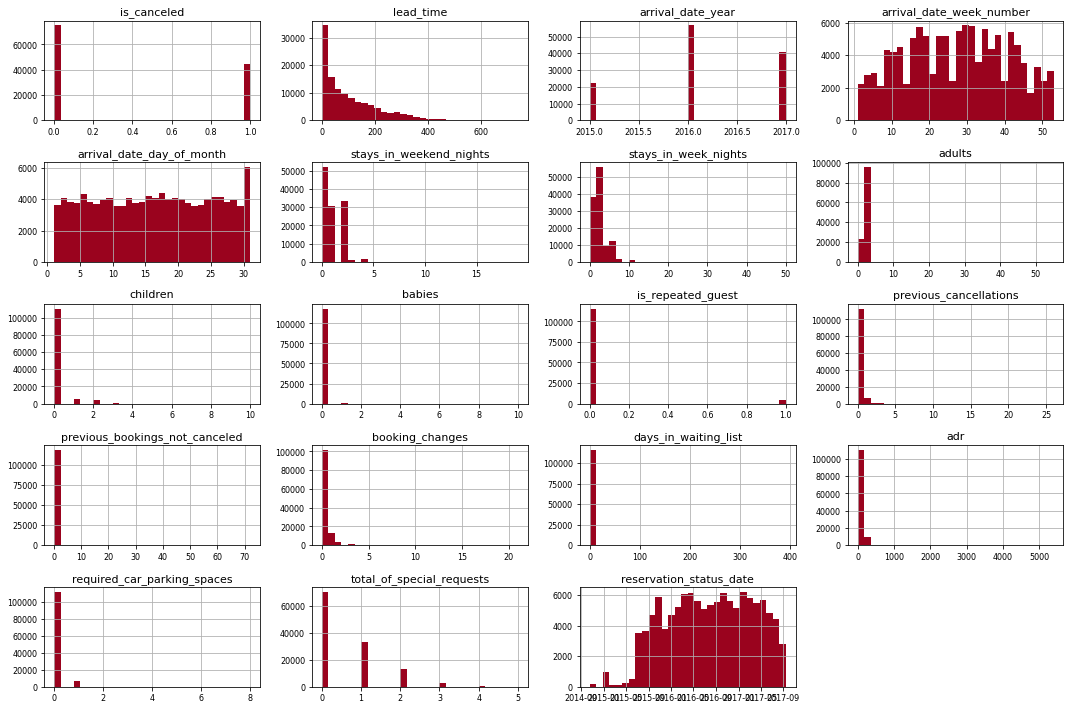

In [14]:
raw_data.hist(bins=30, figsize=(15, 10))
plt.tight_layout();

In [15]:
numeric_values = len(raw_data.select_dtypes(include=['int64', 'float64']).columns)

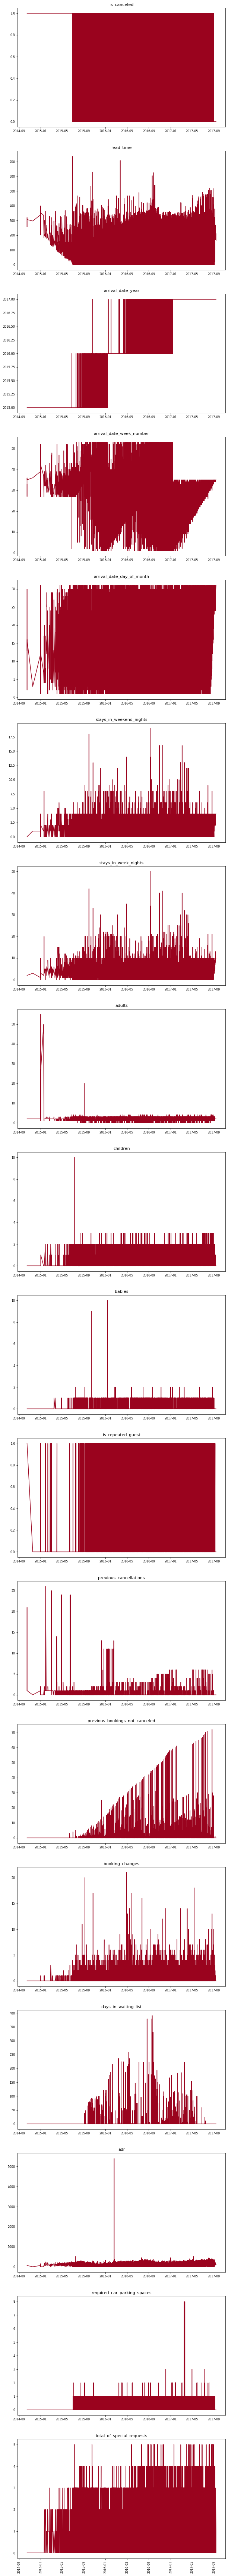

In [16]:
fig, ax = plt.subplots(nrows=numeric_values, ncols=1, figsize=(10,7*numeric_values))
i=0
for col in (raw_data):
    if raw_data[col].dtype == 'int64' or raw_data[col].dtype == 'float64':
        #raw_data[col].plot(ax=ax[i])
        raw_data = raw_data.sort_values('reservation_status_date', ascending=True)
        ax[i].plot(raw_data['reservation_status_date'], raw_data[col])
        plt.xticks(rotation='vertical')
        ax[i].set_title(col)
        i+=1

Other missing values extra than the Undefined:

In [17]:
raw_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

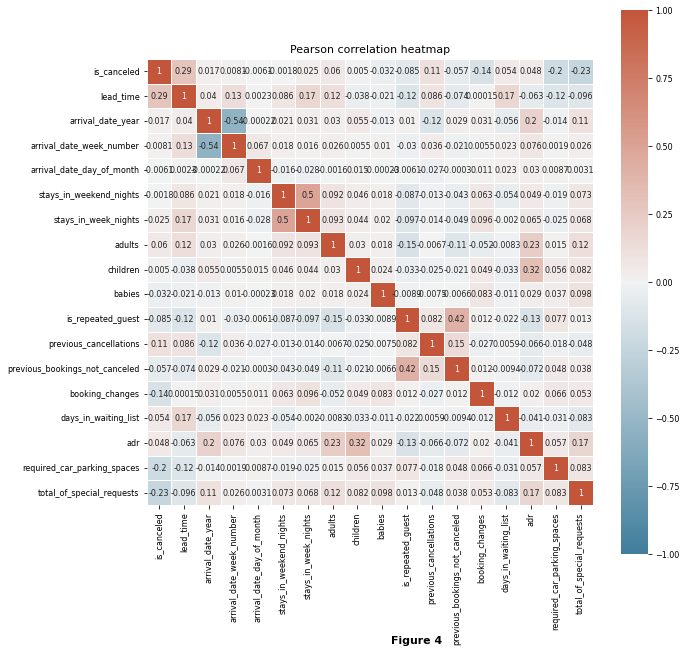

In [18]:
corr = raw_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, annot=True, center=0,
            square=True, linewidths=.5, annot_kws={"fontsize":SMALL_SIZE})
plt.figtext(0.5, 0, 'Figure 4', wrap=True, horizontalalignment='center', fontweight='bold', fontsize=MEDIUM_SIZE);
plt.title('Pearson correlation heatmap');

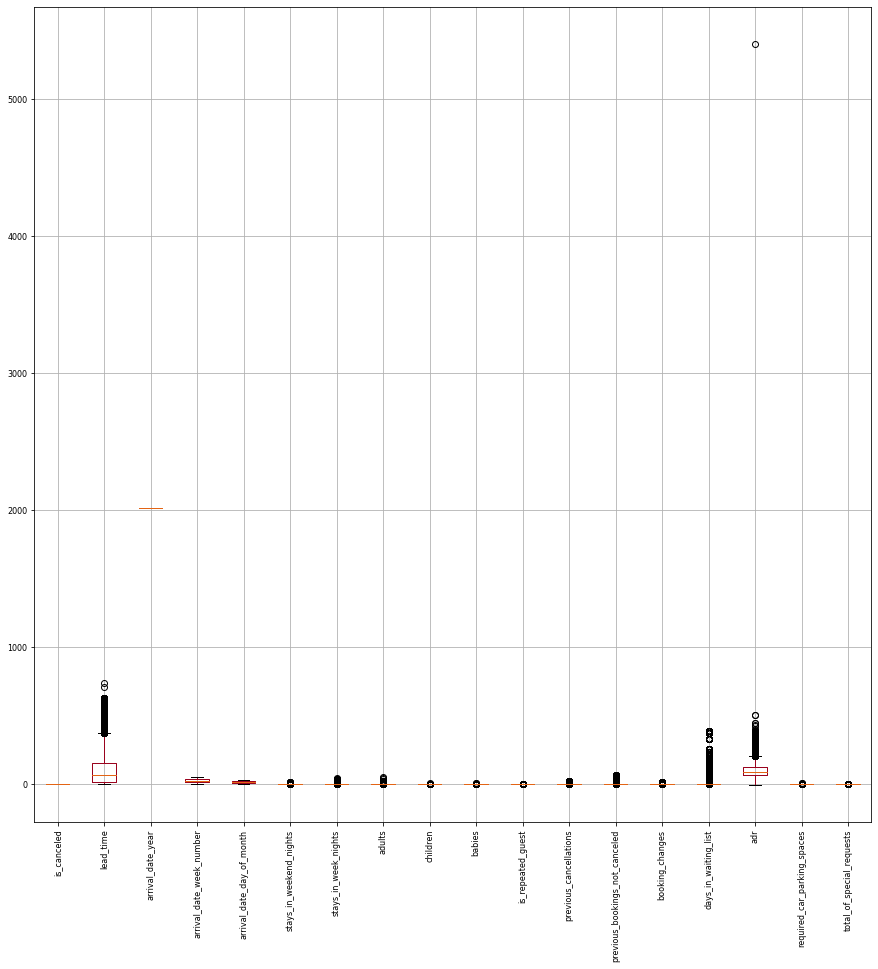

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
tmp = (raw_data.loc[:, raw_data.dtypes == 'int64']).apply(lambda iterator: ((iterator - iterator.mean())/iterator.std()).round(2))

raw_data.boxplot()
plt.xticks(rotation='vertical');

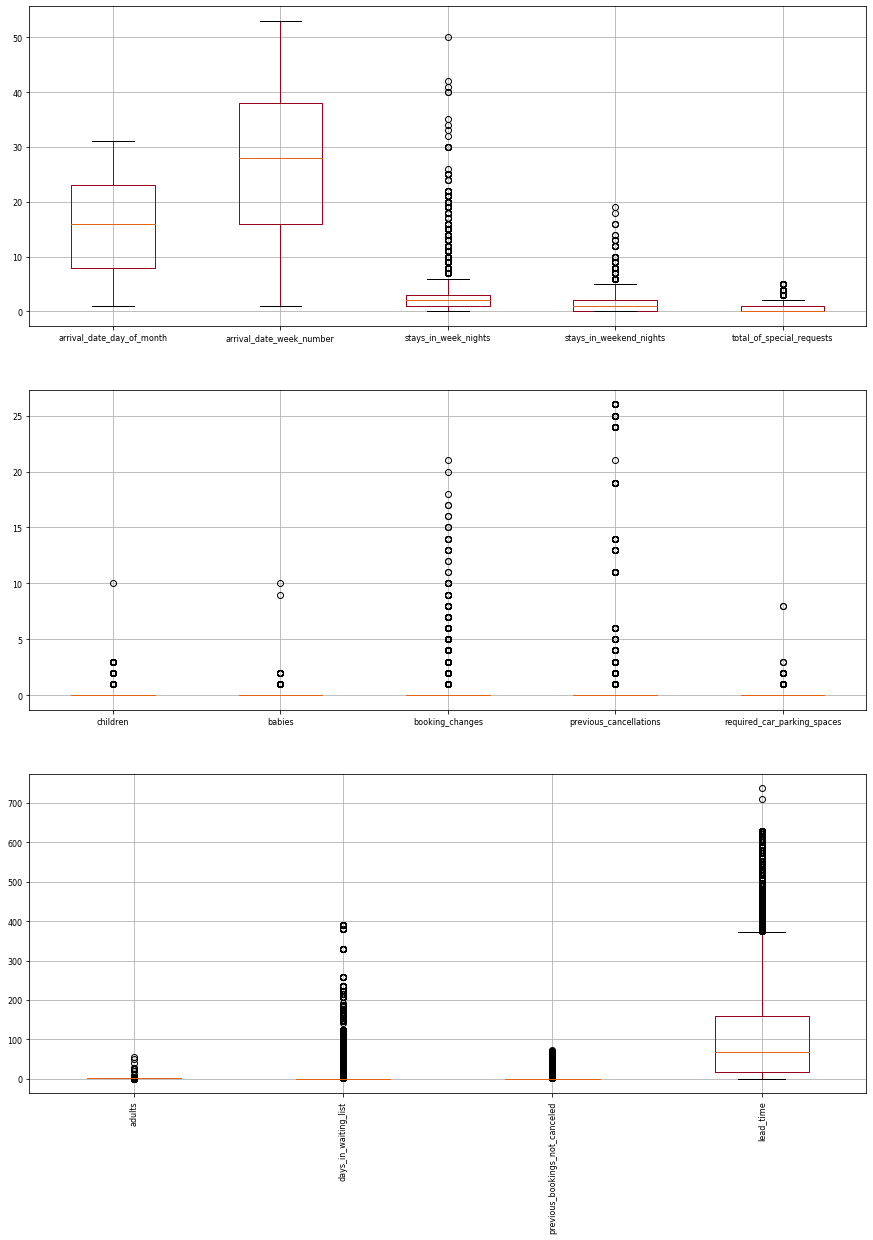

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(15,20))
raw_data['total_of_special_requests']
raw_data[['arrival_date_day_of_month','arrival_date_week_number', 'stays_in_week_nights', 'stays_in_weekend_nights', 'total_of_special_requests']].boxplot(ax=ax[0])
raw_data[['children','babies', 'booking_changes', 'previous_cancellations', 'required_car_parking_spaces']].boxplot(ax=ax[1])
raw_data[['adults','days_in_waiting_list', 'previous_bookings_not_canceled', 'lead_time']].boxplot(ax=ax[2])
plt.xticks(rotation='vertical');

# Ideas for future parts

- transform cyclical data https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning  and  https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes . Ex: months first into numbers, then into periodical values